**Neural Network**

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils.create_features_utils_USOpen import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import models, layers
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import load_model
sns.set_style("darkgrid")

In [30]:
# Dataset import
df = pd.read_csv('USOpen_matches_with_feature.csv')  

# Drop N/A Values
df = df.dropna()

# Return 10 rows of data 
df.head(10)

,Tournament,Date,Surface,Round,player_0,player_0_rank,player_0_odd,player_1,player_1_rank,player_1_odd,...,diff_5_set_match_win_percent_52,diff_close_sets_percent_52,diff_match_win_percent_hard_60,diff_games_win_percent_hard_60,diff_5_set_match_win_percent_hard_60,diff_close_sets_percent_hard_60,diff_match_win_percent_hh,diff_games_win_percent_hh,diff_match_win_percent_hard_hh,diff_games_win_percent_hard_hh
0,US Open,2010/08/30,Hard,1st Round,Cilic M.,13.0,1.12,Marchenko I.,73.0,5.50,...,0.416667,0.137053,0.169872,0.051541,0.318182,0.129361,0.0,0.000000,0.0,0.000000
1,US Open,2010/08/30,Hard,1st Round,Davydenko N.,6.0,1.06,Russell M.,80.0,8.00,...,0.550000,0.165212,0.314777,0.078499,0.875000,0.107312,0.0,0.000000,0.0,0.000000
2,US Open,2010/08/30,Hard,1st Round,Ferrero J.C.,24.0,1.14,Klizan M.,293.0,5.00,...,0.500000,0.066879,0.473684,0.492274,0.500000,0.430769,0.0,0.000000,0.0,0.000000
3,US Open,2010/08/30,Hard,1st Round,Gasquet R.,38.0,1.12,Greul S.,84.0,5.50,...,-0.200000,0.150082,0.106754,0.039686,-0.333333,0.079051,0.0,0.090909,0.0,0.090909
4,US Open,2010/08/30,Hard,1st Round,De Bakker T.,48.0,1.20,Gicquel M.,170.0,4.33,...,0.238095,0.143548,0.004545,-0.014427,-0.500000,0.029643,-1.0,-0.183673,-1.0,-0.183673
5,US Open,2010/08/30,Hard,1st Round,Mello R.,81.0,1.53,Phau B.,97.0,2.37,...,0.000000,-0.124156,-0.066667,-0.025470,0.000000,-0.092199,0.0,0.000000,0.0,0.000000
6,US Open,2010/08/30,Hard,1st Round,Soderling R.,5.0,1.01,Haider-Maurer A.,214.0,15.00,...,0.750000,0.139229,0.693878,0.161242,0.500000,0.606452,0.0,0.000000,0.0,0.000000
7,US Open,2010/08/30,Hard,1st Round,Monfils G.,19.0,1.25,Kendrick R.,148.0,3.75,...,0.303030,0.148299,0.347518,0.037940,0.166667,0.118627,1.0,0.130435,1.0,0.130435
8,US Open,2010/08/30,Hard,1st Round,Zeballos H.,61.0,2.62,Andreev I.,121.0,1.44,...,0.333333,0.023477,0.071053,0.008011,0.333333,0.007440,0.0,0.000000,0.0,0.000000
9,US Open,2010/08/30,Hard,1st Round,Melzer J.,15.0,1.16,Tursunov D.,481.0,4.50,...,0.692308,0.260507,0.166667,0.021703,0.333333,-0.099144,-1.0,-0.076923,-1.0,-0.076923


In [31]:
# Create Diff_Rank Variable
df['diff_rank'] = df['player_0_rank'] - df['player_1_rank']

# List all the features
features_list = [
 'diff_rank',
 'diff_match_win_percent',
 'diff_games_win_percent',
 'diff_5_set_match_win_percent',
 'diff_close_sets_percent',
 'diff_match_win_percent_hard',
 'diff_games_win_percent_hard',
 'diff_5_set_match_win_percent_hard',
 'diff_close_sets_percent_hard',
 'diff_match_win_percent_52',
 'diff_games_win_percent_52',
 'diff_5_set_match_win_percent_52',
 'diff_close_sets_percent_52',
 'diff_match_win_percent_hard_60',
 'diff_games_win_percent_hard_60',
 'diff_5_set_match_win_percent_hard_60',
 'diff_close_sets_percent_hard_60',
 'diff_match_win_percent_hh',
 'diff_games_win_percent_hh',
 'diff_match_win_percent_hard_hh',
 'diff_games_win_percent_hard_hh']

In [32]:
target = df.outcome
features = df[features_list]

train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.20, random_state=1)

In [33]:
# Building Neural network
network = models.Sequential()
network.add(layers.Dense(units=64, activation='relu', input_shape=(len(features.columns),)))
network.add(layers.Dense(units=32, activation='relu'))
network.add(layers.Dense(units=1, activation='sigmoid'))
network.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=500)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

history = network.fit(train_features, train_target, 
            epochs=1000, verbose=0, batch_size=128, 
            validation_data=(test_features, test_target), callbacks=[es, mc]) 

saved_model = load_model('best_model.h5')



Epoch 00001: val_loss improved from inf to 0.62195, saving model to best_model.h5

Epoch 00002: val_loss did not improve from 0.62195

Epoch 00003: val_loss improved from 0.62195 to 0.61921, saving model to best_model.h5

Epoch 00004: val_loss improved from 0.61921 to 0.61167, saving model to best_model.h5

Epoch 00005: val_loss improved from 0.61167 to 0.60397, saving model to best_model.h5

Epoch 00006: val_loss improved from 0.60397 to 0.58435, saving model to best_model.h5

Epoch 00007: val_loss did not improve from 0.58435

Epoch 00008: val_loss improved from 0.58435 to 0.57479, saving model to best_model.h5

Epoch 00009: val_loss did not improve from 0.57479

Epoch 00010: val_loss improved from 0.57479 to 0.56128, saving model to best_model.h5

Epoch 00011: val_loss improved from 0.56128 to 0.55562, saving model to best_model.h5

Epoch 00012: val_loss did not improve from 0.55562

Epoch 00013: val_loss improved from 0.55562 to 0.55190, saving model to best_model.h5

Epoch 00014:


Epoch 00151: val_loss did not improve from 0.52105

Epoch 00152: val_loss did not improve from 0.52105

Epoch 00153: val_loss did not improve from 0.52105

Epoch 00154: val_loss did not improve from 0.52105

Epoch 00155: val_loss did not improve from 0.52105

Epoch 00156: val_loss did not improve from 0.52105

Epoch 00157: val_loss did not improve from 0.52105

Epoch 00158: val_loss did not improve from 0.52105

Epoch 00159: val_loss did not improve from 0.52105

Epoch 00160: val_loss did not improve from 0.52105

Epoch 00161: val_loss did not improve from 0.52105

Epoch 00162: val_loss did not improve from 0.52105

Epoch 00163: val_loss did not improve from 0.52105

Epoch 00164: val_loss did not improve from 0.52105

Epoch 00165: val_loss did not improve from 0.52105

Epoch 00166: val_loss did not improve from 0.52105

Epoch 00167: val_loss did not improve from 0.52105

Epoch 00168: val_loss did not improve from 0.52105

Epoch 00169: val_loss did not improve from 0.52105

Epoch 00170


Epoch 00314: val_loss did not improve from 0.52105

Epoch 00315: val_loss did not improve from 0.52105

Epoch 00316: val_loss did not improve from 0.52105

Epoch 00317: val_loss did not improve from 0.52105

Epoch 00318: val_loss did not improve from 0.52105

Epoch 00319: val_loss did not improve from 0.52105

Epoch 00320: val_loss did not improve from 0.52105

Epoch 00321: val_loss did not improve from 0.52105

Epoch 00322: val_loss did not improve from 0.52105

Epoch 00323: val_loss did not improve from 0.52105

Epoch 00324: val_loss did not improve from 0.52105

Epoch 00325: val_loss did not improve from 0.52105

Epoch 00326: val_loss did not improve from 0.52105

Epoch 00327: val_loss did not improve from 0.52105

Epoch 00328: val_loss did not improve from 0.52105

Epoch 00329: val_loss did not improve from 0.52105

Epoch 00330: val_loss did not improve from 0.52105

Epoch 00331: val_loss did not improve from 0.52105

Epoch 00332: val_loss did not improve from 0.52105

Epoch 00333


Epoch 00477: val_loss did not improve from 0.52105

Epoch 00478: val_loss did not improve from 0.52105

Epoch 00479: val_loss did not improve from 0.52105

Epoch 00480: val_loss did not improve from 0.52105

Epoch 00481: val_loss did not improve from 0.52105

Epoch 00482: val_loss did not improve from 0.52105

Epoch 00483: val_loss did not improve from 0.52105

Epoch 00484: val_loss did not improve from 0.52105

Epoch 00485: val_loss did not improve from 0.52105

Epoch 00486: val_loss did not improve from 0.52105

Epoch 00487: val_loss did not improve from 0.52105

Epoch 00488: val_loss did not improve from 0.52105

Epoch 00489: val_loss did not improve from 0.52105

Epoch 00490: val_loss did not improve from 0.52105

Epoch 00491: val_loss did not improve from 0.52105

Epoch 00492: val_loss did not improve from 0.52105

Epoch 00493: val_loss did not improve from 0.52105

Epoch 00494: val_loss did not improve from 0.52105

Epoch 00495: val_loss did not improve from 0.52105

Epoch 00496

In [34]:
# Accuracy of Best Model

_, train_acc = saved_model.evaluate(train_features, train_target, verbose=0)
_, test_acc = saved_model.evaluate(test_features, test_target, verbose=0)

print('Train Accuracy: %.3f, Test Accuracy: %.3f' % (train_acc, test_acc))

Train Accuracy: 0.758, Test Accuracy: 0.776


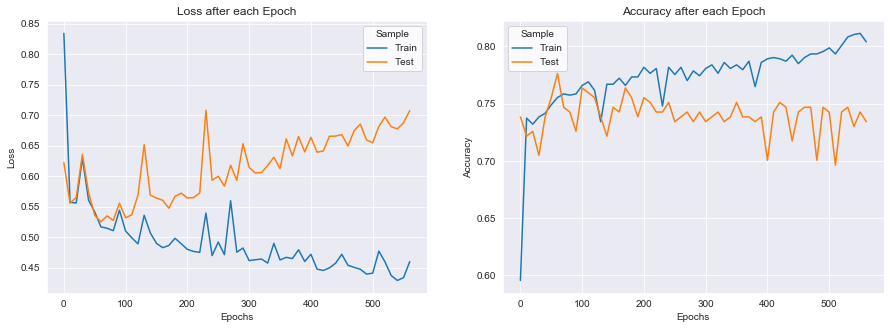

In [35]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title('Loss after each Epoch')
plt.plot(history.epoch[::10], history.history['loss'][::10], label='Train')
plt.plot(history.epoch[::10], history.history['val_loss'][::10], label='Test')
plt.legend(['Train', 'Test'],loc='upper right', title='Sample', facecolor='white',fancybox=True)
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.title('Accuracy after each Epoch')
plt.plot(history.epoch[::10], history.history['accuracy'][::10], label='Train')
plt.plot(history.epoch[::10], history.history['val_accuracy'][::10], label='Test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left', title='Sample', facecolor='white', fancybox=True)

plt.savefig('Results.jpg', quality=100)